In [1]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt
import math

Вариант 38

**Случай 1.** Рассмотрим две фирмы, производящие взаимозаменяемые товары
одинакового качества и находящиеся в одной рыночной нише. Считаем, что в рамках
нашей модели конкурентная борьба ведётся только рыночными методами. То есть,
конкуренты могут влиять на противника путем изменения параметров своего
производства: себестоимость, время цикла, но не могут прямо вмешиваться в
ситуацию на рынке («назначать» цену или влиять на потребителей каким-либо иным 
способом.) Будем считать, что постоянные издержки пренебрежимо малы, и в
модели учитывать не будем. В этом случае динамика изменения объемов продаж
фирмы 1 и фирмы 2 описывается следующей системой уравнений:

$$\frac{dM_1}{d\Theta} = M_1 - \frac{b}{c_1}M_1 M_2 - \frac{a_1}{c_1} M_1^2 $$

$$ \frac{dM_2}{d\Theta} = \frac{c_2}{c_1} M_2 - \frac{b}{c_1} M_1 M_2 - \frac{a_2}{c_1} M_2^2$$

где $ a_1 = \frac{p_{cr}}{\tau_1^2 \widetilde{p}1^2 Nq } $, 
$ a_2 = \frac{p_{cr}}{\tau_2^2 \widetilde{p}2^2 Nq } $, 
$ b = \frac{p_{cr}}{\tau_1^2 \widetilde{p}_1^2 \tau_2^2 \widetilde{p}_2^2 Nq} $, 
$ c_1 = \frac{p_{cr} - \widetilde{p}_1}{\tau_1 \widetilde{p}_1} $, $ c_2 = 
\frac{p_{cr} - \widetilde{p}_2}{\tau_2 \widetilde{p}_2} $.

Также введена нормировка $t = c_1 \Theta$.

**Случай 2.** Рассмотрим модель, когда, помимо экономического фактора
влияния (изменение себестоимости, производственного цикла, использование
кредита и т.п.), используются еще и социально-психологические факторы –
формирование общественного предпочтения одного товара другому, не зависимо от
их качества и цены. В этом случае взаимодействие двух фирм будет зависеть друг
от друга, соответственно коэффициент перед $M_1M_2$ будет отличаться. Пусть в
рамках рассматриваемой модели динамика изменения объемов продаж фирмы 1 и
фирмы 2 описывается следующей системой уравнений:

$$\frac{dM_1}{d\Theta} = M_1 - \frac{b}{c_1} M_1 M_2 - 
\frac{a_1}{c_1} M_1^2$$

$$ \frac{dM_2}{d\Theta} = \frac{c_2}{c_1} M_2 - 
(\frac{b}{c_1} + 0.00083)M_1 M_2 - 
\frac{a_2}{c_1} M_2^2 $$

Для обоих случаев рассмотрим задачу со следующими начальными условиями и
параметрами:

$$ M_0^1=3.9, M_0^2=2.9 $$ 
$$ p_{cr}=25, N=39, q=1 $$ 
$$ \tau_1=29, \tau_2=19 $$ 
$$ \widetilde{p}_1=6.9, \widetilde{p}_2=15.9 $$

1. Постройте графики изменения оборотных средств фирмы 1 и фирмы 2 без
учета постоянных издержек и с веденной нормировкой для случая 1.
2. Постройте графики изменения оборотных средств фирмы 1 и фирмы 2 без
учета постоянных издержек и с веденной нормировкой для случая 2.

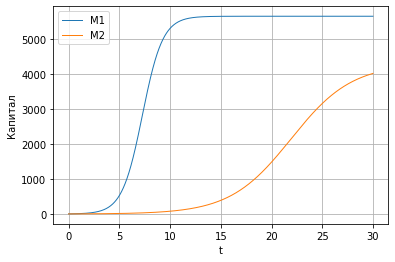

In [10]:
f0=[3.9, 2.9]
p_cr=25
N=39
q=1
tau1=29
tau2=19
p1=6.9
p2=15.9

a1=p_cr/(tau1*tau1*p1*p1*N*q)
a2=p_cr/(tau2*tau2*p2*p2*N*q)
b=p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*N*q)
c1=(p_cr-p1)/(tau1*p1)
c2=(p_cr-p2)/(tau2*p2)

t0=0
t=np.arange(t0, 30, 0.01)

def eq1(f, t):
    f1, f2=f
    return [f1-(b/c1)*f1*f2-(a1/c1)*f1*f1, (c2/c1)*f2-(b/c1)*f1*f2-(a2/c1)*f2*f2]

def eq2(f, t):
    f1, f2=f
    return [f1-(b/c1)*f1*f2-(a1/c1)*f1*f1, (c2/c1)*f2-(b/c1+0.00083)*f1*f2-(a2/c1)*f2*f2]

f1=odeint(eq1, f0, t)
f2=odeint(eq2, f0, t)

M1_1=f1[:,0]
M2_1=f1[:,1]
M1_2=f2[:,0]
M2_2=f2[:,1]

graph1=plt.figure(facecolor='white')
plt.plot(t, M1_1, linewidth=1, label='M1')
plt.plot(t, M2_1, linewidth=1, label='M2')
plt.xlabel("t")
plt.ylabel("Капитал")
plt.grid(True)
plt.legend()
plt.show()
graph1.savefig('graph1.png', dpi=800)

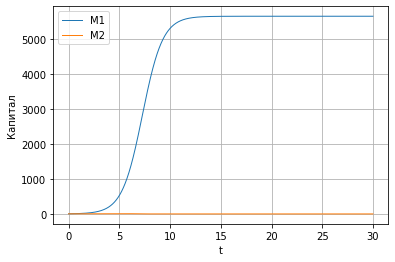

In [11]:
graph2=plt.figure(facecolor='white')
plt.plot(t, M1_2, linewidth=1, label='M1')
plt.plot(t, M2_2, linewidth=1, label='M2')
plt.xlabel("t")
plt.ylabel("Капитал")
plt.grid(True)
plt.legend()
plt.show()
graph2.savefig('graph2.png', dpi=800)